# US Gasoline Consumption

- Year = Year, 1953-2004,
- GasExp = Total U.S. gasoline expenditure,
- Pop = U.S. total population in thousands
- GasP = Price index for gasoline,
- Income = Per capita disposable income,
- Pnc = Price index for new cars,
- Puc = Price index for used cars,
- Ppt = Price index for public transportation,
- Pd = Aggregate price index for consumer durables,
- Pn = Aggregate price index for consumer nondurables,
- Ps = Aggregate price index for consumer services.

Note that the consumption
data appear as total expenditure. To obtain the per capita quantity variable, divide GASEXP (total U.S.
gas expenditure) by GASP (price index for gasoline) times Pop (U.S. population in thousands). The other
variables do not need transformation


In [82]:
clear 
import delimited TableF2-2.csv
gen demand = (gasexp*10^9) / (gasp * pop*10^3)

list in -10/l



(11 vars, 52 obs)



     +------------------------------------------------------------------------------------------------------+
     | year   gasexp      pop      gasp   income     pnc     puc     ppt      pd      pn      ps     demand |
     |------------------------------------------------------------------------------------------------------|
 43. | 1995    120.2   266588    77.826    22100     139   156.5   175.9     128   139.3   168.7   5.793476 |
 44. | 1996    130.4   269714    82.596    22506   141.4     157   181.9   129.4   143.5   174.1   5.853492 |
 45. | 1997    134.4   272958    82.579    22944   141.7   151.1   186.7   128.7   146.4   179.4   5.962574 |
 46. | 1998    122.4   276154    71.874    24079   140.7   150.6   190.3   127.6   146.9   184.2   6.166777 |
 47. | 1999    137.9   279328    78.207    24464   139.6     152   197.7     126   151.2   188.8    6.31254 |
     |-------------------------------------------------------------------------------------------

(bin=7, start=2.7823427, width=.50431391)


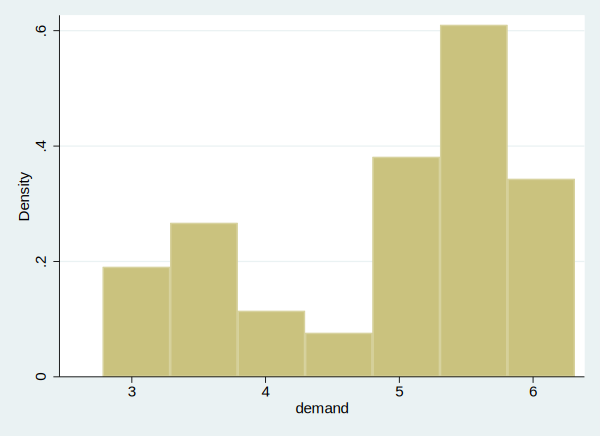

In [24]:
hist demand

What is the unit here?

a. Compute the multiple regression of per capita consumption of gasoline on per capita income, the price of gasoline, all the other prices and a time trend. Report all results. Do the signs of the estimates agree with your expectations?

In [2]:
regress demand income gasp pnc puc ppt pd pn ps year


      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(9, 42)        =    530.82
       Model |  56.7083042         9  6.30092268   Prob > F        =    0.0000
    Residual |   .49854905        42  .011870215   R-squared       =    0.9913
-------------+----------------------------------   Adj R-squared   =    0.9894
       Total |  57.2068532        51    1.121703   Root MSE        =    .10895

------------------------------------------------------------------------------
      demand |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      income |   .0002157   .0000518     4.17   0.000     .0001113    .0003202
        gasp |  -.0110838   .0039781    -2.79   0.008     -.019112   -.0030557
         pnc |   .0005774   .0128441     0.04   0.964    -.0253432    .0264979
         puc |  -.0058746   .0048703    -1.21   0.

b. Test the hypothesis that at least in regard to demand for gasoline, consumers do not differentiate between changes in the prices of new and used cars.

In [3]:
regress demand pnc puc // comparing price difference


      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(2, 49)        =     58.73
       Model |   40.368129         2  20.1840645   Prob > F        =    0.0000
    Residual |  16.8387243        49  .343647434   R-squared       =    0.7057
-------------+----------------------------------   Adj R-squared   =    0.6936
       Total |  57.2068532        51    1.121703   Root MSE        =    .58621

------------------------------------------------------------------------------
      demand |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         pnc |   .0271528   .0200263     1.36   0.181    -.0130917    .0673972
         puc |  -.0023139   .0145438    -0.16   0.874    -.0315407     .026913
       _cons |   2.737943   .6465179     4.23   0.000     1.438716    4.037169
--------------------------------------------------

In [4]:
corr pnc puc, cov

(obs=52)

             |      pnc      puc
-------------+------------------
         pnc |  1375.48
         puc |  1882.38  2607.96





      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(9, 42)        =    530.82
       Model |  56.7083042         9  6.30092268   Prob > F        =    0.0000
    Residual |   .49854905        42  .011870215   R-squared       =    0.9913
-------------+----------------------------------   Adj R-squared   =    0.9894
       Total |  57.2068532        51    1.121703   Root MSE        =    .10895

------------------------------------------------------------------------------
      demand |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      income |   .0002157   .0000518     4.17   0.000     .0001113    .0003202
        gasp |  -.0110838   .0039781    -2.79   0.008     -.019112   -.0030557
         pnc |   .0005774   .0128441     0.04   0.964    -.0253432    .0264979
         puc |  -.0058746   .0048703    -1.21   0

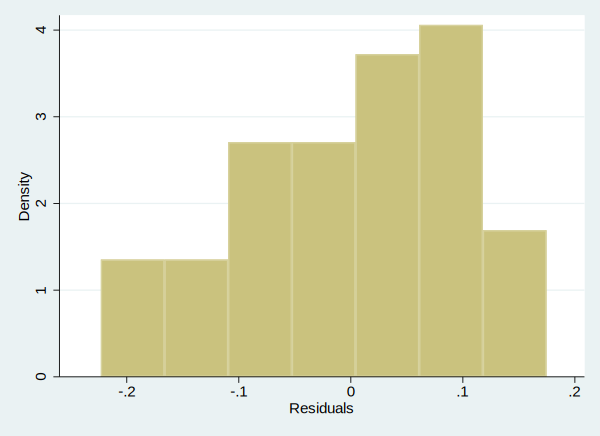

In [32]:
regress demand income gasp pnc puc ppt pd pn ps year
predict resid, resid

In [42]:
swilk log_resid
swilk resid


                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
   log_resid |         52    0.96537      1.680     1.109    0.13376


In [45]:
hettest log_resid
hettest resid



Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: log_resid

         chi2(1)      =     3.25
         Prob > chi2  =   0.0716


Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: resid

         chi2(1)      =     5.04
         Prob > chi2  =   0.0248



(bin=7, start=-.2231431, width=.05683514)


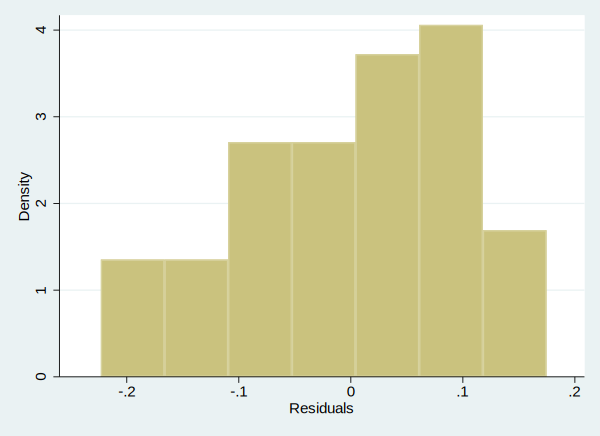




(bin=7, start=-.0405542, width=.0106001)


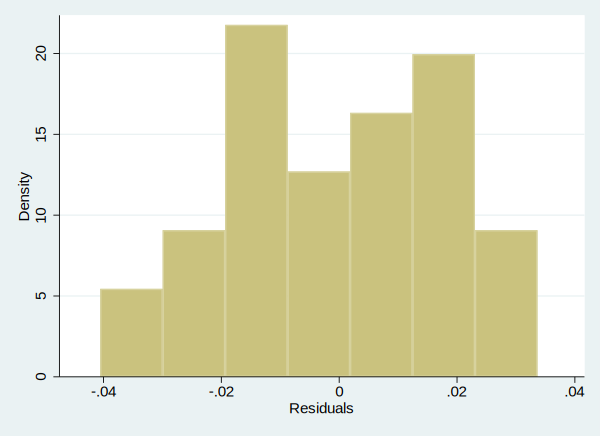

In [39]:
hist resid 
hist log_resid

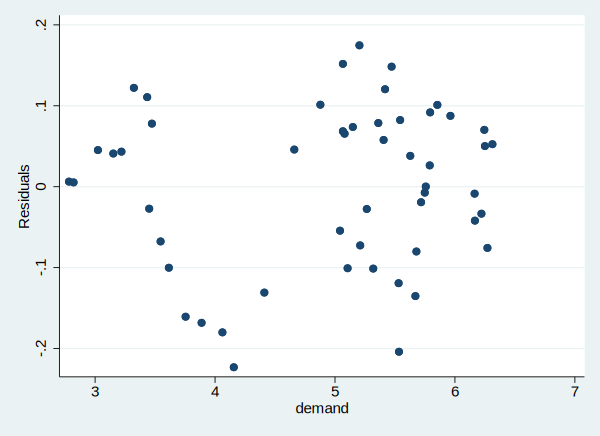

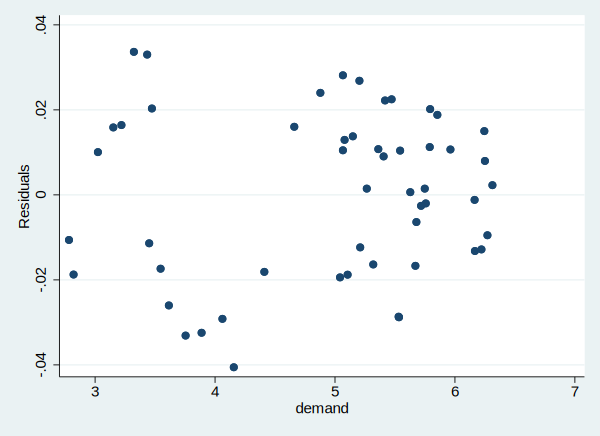

In [40]:
scatter resid demand 
scatter log_resid demand

c. Estimate the own price elasticity of demand, the income elasticity, and the cross-price elasticity with respect to changes in the price of public transportation. Do the computations at the 2004 point in the data.
- The price elasticity of demand  of gasoline is 
- The income elasticity is
- The cross-price elasticity with respect to changes in price of public transportation


In [6]:
summarize gasp income ppt demand if year == 2004


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        gasp |          1     123.901           .    123.901    123.901
      income |          1       27113           .      27113      27113
         ppt |          1       209.1           .      209.1      209.1
      demand |          1    6.164056           .   6.164056   6.164056


In [7]:
margins if year == 2004, eyex(gasp income ppt)


Average marginal effects                        Number of obs     =          1
Model VCE    : OLS

Expression   : Linear prediction, predict()
ey/ex w.r.t. : income gasp ppt

------------------------------------------------------------------------------
             |            Delta-method
             |      ey/ex   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      income |   .9476599   .2262966     4.19   0.000     .4909749    1.404345
        gasp |  -.2224796   .0809311    -2.75   0.009    -.3858053    -.059154
         ppt |   .2339837   .1644132     1.42   0.162    -.0978155     .565783
------------------------------------------------------------------------------


In [30]:
summ demand


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      demand |         52    4.935619    1.059105   2.782343    6.31254


d. Reestimate the regression in logarithms so that the coefficients are direct estimates of the elasticities. (Do not use the log of the time trend). How do your estimates compare with the results in the previous question? Which specification do you prefer?

In [90]:
gen ldemand = log(demand)
gen lgasp = log(gasp)
gen lincome = log(income)
gen lpnc = log(pnc)
gen lpuc = log(puc)
gen lppt = log(ppt)
gen lpd = log(pd)
gen lpn = log(pn)
gen lps = log(ps)



      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(9, 42)        =    718.05
       Model |  2.88979593         9  .321088437   Prob > F        =    0.0000
    Residual |  .018780964        42  .000447166   R-squared       =    0.9935
-------------+----------------------------------   Adj R-squared   =    0.9922
       Total |   2.9085769        51   .05703092   Root MSE        =    .02115

------------------------------------------------------------------------------
     ldemand |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      income |   .0000375     .00001     3.74   0.001     .0000173    .0000578
        gasp |  -.0012406   .0007721    -1.61   0.116    -.0027988    .0003176
         pnc |   .0006404   .0024929     0.26   0.799    -.0043905    .0056713
         puc |  -.0019467   .0009453    -2.06   0

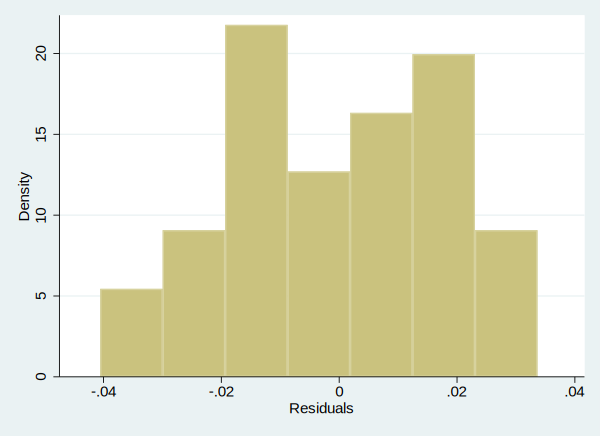

In [31]:
regress ldemand income gasp pnc puc ppt pd pn ps year
predict log_resid, resid
hist log_resid

// regress demand income gasp pnc puc ppt pd pn ps year
// regress ldemand lincome lgasp lpnc lpuc lppt lpd lpn lps year
// regress demand income gasp pnc puc ppt pd pn ps year

In [46]:
ovtest
quietly regress demand income gasp pnc puc ppt pd pn ps year
ovtest 



Ramsey RESET test using powers of the fitted values of demand
       Ho:  model has no omitted variables
                  F(3, 39) =      8.56
                  Prob > F =      0.0002



Ramsey RESET test using powers of the fitted values of demand
       Ho:  model has no omitted variables
                  F(3, 39) =      8.56
                  Prob > F =      0.0002


e. Compute the simple correlations of the price variables. Would you conclude that multicollinearity is a "problem" for the regression in part a or part d?

In [50]:
qui regress demand income gasp pnc puc ppt pd pn ps year
vif




    Variable |       VIF       1/VIF  
-------------+----------------------
          pn |   1614.88    0.000619
          ps |   1229.94    0.000813
         pnc |    974.93    0.001026
          pd |    820.65    0.001219
         ppt |    481.06    0.002079
      income |    354.84    0.002818
         puc |    265.78    0.003762
        year |    198.49    0.005038
        gasp |     64.62    0.015476
-------------+----------------------
    Mean VIF |    667.24


In [52]:
qui regress ldemand income gasp pnc puc ppt pd pn ps year
vif




    Variable |       VIF       1/VIF  
-------------+----------------------
          pn |   1614.88    0.000619
          ps |   1229.94    0.000813
         pnc |    974.93    0.001026
          pd |    820.65    0.001219
         ppt |    481.06    0.002079
      income |    354.84    0.002818
         puc |    265.78    0.003762
        year |    198.49    0.005038
        gasp |     64.62    0.015476
-------------+----------------------
    Mean VIF |    667.24


In [ ]:
quietly regress pc_quan income gasp pnc puc ppt pd pn ps year
vif 

In [ ]:
 pnc puc ppt pd pn ps

f. Notice that the price index for gasoline is normalized to 100 in 2000, whereas the other price indices are anchored at 1983 (roughly). If you were to renormalize the indices so that they were all 100.00 in 2004, then how would the results of the regression in part a change? How would the results of the regression in part d change?


In [83]:
gen gasp_new = (gasp * 100) / gasp[52]
gen pnc_new = (pnc * 100) / pnc[52]
gen puc_new = (puc * 100) / puc[52]
gen ppt_new = (ppt * 100) / ppt[52]
gen pd_new = (pd * 100) / pd[52]
gen pn_new = (pn * 100) / pn[52]
gen ps_new = (ps * 100) / ps[52]
summ ps_new if year == 2004

In [92]:
regress demand income gasp pnc puc ppt pd pn ps year
regress demand income gasp_new pnc_new puc_new ppt_new pd_new pn_new ps_new year



      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(9, 42)        =    530.82
       Model |  56.7083042         9  6.30092268   Prob > F        =    0.0000
    Residual |   .49854905        42  .011870215   R-squared       =    0.9913
-------------+----------------------------------   Adj R-squared   =    0.9894
       Total |  57.2068532        51    1.121703   Root MSE        =    .10895

------------------------------------------------------------------------------
      demand |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      income |   .0002157   .0000518     4.17   0.000     .0001113    .0003202
        gasp |  -.0110838   .0039781    -2.79   0.008     -.019112   -.0030557
         pnc |   .0005774   .0128441     0.04   0.964    -.0253432    .0264979
         puc |  -.0058746   .0048703    -1.21   0

In [93]:
regress ldemand income gasp pnc puc ppt pd pn ps year
regress ldemand income gasp_new pnc_new puc_new ppt_new pd_new pn_new ps_new year



      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(9, 42)        =    718.05
       Model |  2.88979593         9  .321088437   Prob > F        =    0.0000
    Residual |  .018780964        42  .000447166   R-squared       =    0.9935
-------------+----------------------------------   Adj R-squared   =    0.9922
       Total |   2.9085769        51   .05703092   Root MSE        =    .02115

------------------------------------------------------------------------------
     ldemand |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      income |   .0000375     .00001     3.74   0.001     .0000173    .0000578
        gasp |  -.0012406   .0007721    -1.61   0.116    -.0027988    .0003176
         pnc |   .0006404   .0024929     0.26   0.799    -.0043905    .0056713
         puc |  -.0019467   .0009453    -2.06   0

In [ ]:
regress pc_quan income gasp_nor pnc_nor puc_nor ppt_nor pd_nor pn_nor ps_nor year

In [ ]:
gen lgasp_nor = log(gasp_nor)
gen lpnc_nor = log(pnc_nor)
gen lpuc_nor = log(puc_nor)
gen lppt_nor = log(ppt_nor)
gen lpd_nor = log(pd_nor)
gen lpn_nor = log(pn_nor)
gen lps_nor = log(ps_nor)

In [ ]:
regress lpc_quan lincome lgasp_nor lpnc_nor lpuc_nor lppt_nor lpd_nor lpn_nor lps_nor year